In [2]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import os

import zipfile

import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np

from tensorflow.keras.utils import load_img, img_to_array

In [3]:
# Download the training set

!wget https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip

!wget https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip

--2024-10-11 05:59:34--  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 173.194.195.207, 142.251.184.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: 'horse-or-human.zip'

horse-or-human.zip  100%[===================>] 142.65M   232MB/s    in 0.6s    

2024-10-11 05:59:35 (232 MB/s) - 'horse-or-human.zip' saved [149574867/149574867]

--2024-10-11 05:59:36--  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 74.125.69.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [ap

# Extract the zip file

In [4]:
zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')

zip_ref.extractall('tmp/horse-or-human')



zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')

zip_ref.extractall('tmp/validation-horse-or-human')

zip_ref.close()

## Directiong data into directories

In [5]:
# Directory with training horse pictures

train_horse_dir = os.path.join('tmp/horse-or-human/horses')



# Directory with training human pictures

train_human_dir = os.path.join('tmp/horse-or-human/humans')



# Directory with validation horse pictures

validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')



# Directory with validation human pictures

validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

In [6]:
# naming directories

train_horse_names = os.listdir(train_horse_dir)

print(f'TRAIN SET HORSES: {train_horse_names[:10]}')



train_human_names = os.listdir(train_human_dir)

print(f'TRAIN SET HUMANS: {train_human_names[:10]}')



validation_horse_names = os.listdir(validation_horse_dir)

print(f'VAL SET HORSES: {validation_horse_names[:10]}')



validation_human_names = os.listdir(validation_human_dir)

print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse48-1.png', 'horse19-9.png', 'horse19-2.png', 'horse49-3.png', 'horse10-6.png', 'horse23-5.png', 'horse39-5.png', 'horse36-3.png', 'horse05-8.png', 'horse26-3.png']
TRAIN SET HUMANS: ['human05-15.png', 'human08-16.png', 'human05-28.png', 'human08-11.png', 'human02-11.png', 'human16-27.png', 'human03-19.png', 'human01-18.png', 'human04-22.png', 'human05-27.png']
VAL SET HORSES: ['horse5-018.png', 'horse5-002.png', 'horse5-589.png', 'horse1-568.png', 'horse1-298.png', 'horse1-436.png', 'horse5-342.png', 'horse1-484.png', 'horse3-070.png', 'horse5-550.png']
VAL SET HUMANS: ['valhuman05-07.png', 'valhuman03-07.png', 'valhuman01-20.png', 'valhuman04-24.png', 'valhuman05-23.png', 'valhuman03-14.png', 'valhuman05-10.png', 'valhuman01-14.png', 'valhuman02-12.png', 'valhuman02-18.png']


In [7]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')

print(f'total training human images: {len(os.listdir(train_human_dir))}')

print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')

print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [8]:
%matplotlib inline



nrows = 4

ncols = 4

pic_index = 0

## Plotting images of horses or humans

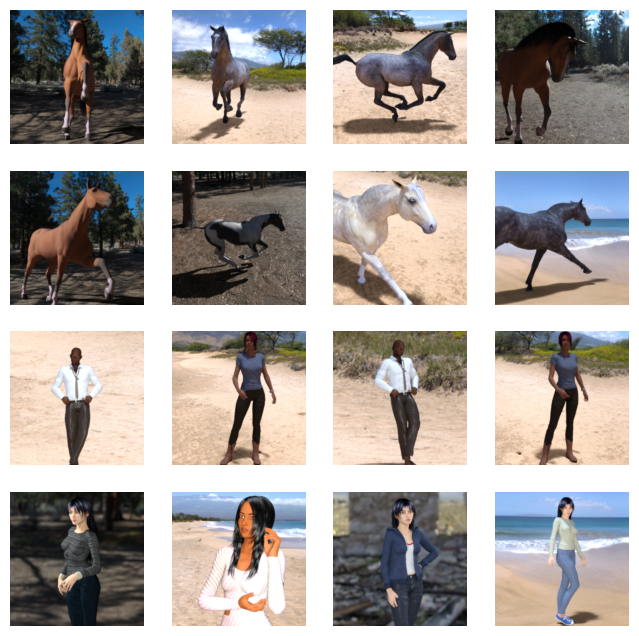

In [9]:
fig = plt.gcf()

fig.set_size_inches(ncols * 2, nrows *2)



pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir, fname)

                for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname)

                for fname in train_human_names[pic_index-8:pic_index]]



for i, img_path in enumerate(next_horse_pix+next_human_pix):

  # Set up subplot; subplot indices start at 1

  sp = plt.subplot(nrows, ncols, i + 1)

  sp.axis('Off') # Don't show axes (or gridlines)



  img = mpimg.imread(img_path)

  plt.imshow(img)



plt.show()

## Building the modle

In [21]:
model = tf.keras.models.Sequential([

    # Note the input shape is the desired size of the image 300x300 with 3 bytes color

    # This is the first convolution

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.BatchNormalization()

    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN

    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer

    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')

    tf.keras.layers.Dense(1, activation='sigmoid')

])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1250042004.py, line 8)

##  Set training parameters

In [22]:
model.compile(loss='binary_crossentropy',

              optimizer=RMSprop(learning_rate=1e-4),

              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 170528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    87,310,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,316,449 (333.09 MB)

 Trainable params: 87,316,449 (333.09 MB)

 Non-trainable params: 0 (0.00 B)

## Data Processing

In [24]:
# Apply data augmentation

train_datagen = ImageDataGenerator(

      rescale=1./255,

      rotation_range=40,

      width_shift_range=0.2,

      height_shift_range=0.2,

      shear_range=0.2,

      zoom_range=0.2,

      horizontal_flip=True,

      fill_mode='nearest')



validation_datagen = ImageDataGenerator(rescale=1/255)



# Flow training images in batches of 128 using train_datagen generator

train_generator = train_datagen.flow_from_directory(

        'tmp/horse-or-human/',  # This is the source directory for training images

        target_size=(300, 300),  # All images will be resized to 300x300

        batch_size=128,

        # Since we use binary_crossentropy loss, we need binary labels

        class_mode='binary')



# Flow training images in batches of 128 using train_datagen generator

validation_generator = validation_datagen.flow_from_directory(

        'tmp/validation-horse-or-human/',  # This is the source directory for validation images

        target_size=(300, 300),  # All images will be resized to 300x300

        batch_size=32,

        # Since we use binary_crossentropy loss, we need binary labels

        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Traion the model

In [26]:
history = model.fit(

      train_generator,

      steps_per_epoch=8,

      epochs = 20,

      validation_data = validation_generator,

      validation_steps=8)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.5048 - loss: 0.7084 - val_accuracy: 0.5000 - val_loss: 0.7088
Epoch 2/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.4922 - loss: 0.6884

AttributeError: 'NoneType' object has no attribute 'items'

## Visualisation the result

In [ ]:
# Plot the model results

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']



epochs = range(len(acc))



plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')



plt.figure()



plt.plot(epochs, loss, 'r', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training and validation loss')

plt.legend()



plt.show()

## Prediction over new data
This prediction will only work in google colab https://colab.google/

In [ ]:
from google.colab import files

uploaded = files.upload()



for fn in uploaded.keys():



  # predicting images

  path = fn

  img = load_img(path, target_size=(300, 300))

  x = img_to_array(img)

  x = np.expand_dims(x, axis=0)



  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:

    print(fn + " is a human")

  else:

    print(fn + " is a horse")